<a href="https://colab.research.google.com/github/krishns18/Deep_Learning/blob/master/Tensorflow/SingleLayerLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete55EI55/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete55EI55/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete55EI55/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 998s 3s/step - loss: 0.5332 - accuracy: 0.7335 - val_loss: 0.4683 - val_accuracy: 0.7909
Epoch 2/10
391/391 [==============================] - 1047s 3s/step - loss: 0.3691 - accuracy: 0.8512 - val_loss: 0.4146 - val_accuracy: 0.8193
Epoch 3/10
391/391 [==============================] - 1037s 3s/step - loss: 0.2851 - accuracy: 0.8905 - val_loss: 0.4102 - val_accuracy: 0.8325
Epoch 4/10
391/391 [==============================] - 1040s 3s/step - loss: 0.2434 - accuracy: 0.9073 - val_loss: 0.4384 - val_accuracy: 0.8326
Epoch 5/10
391/391 [==============================] - 1036s 3s/step - loss: 0.1968 - accuracy: 0.9268 - val_loss: 0.4826 - val_accuracy: 0.8363
Epoch 6/10
391/391 [==============================] - 1027s 3s/step - loss: 0.1461 - accuracy: 0.9478 - val_loss: 0.5220 - val_accuracy: 0.8309
Epoch 7/10
391/391 [==============================] - 1027s 3s/step - loss: 0.2552 - accuracy: 0.8887 - val_loss: 0.6276 - val_accuracy: 

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

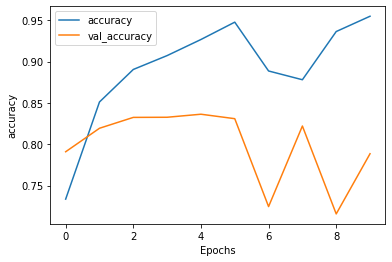

In [10]:
plot_graphs(history, 'accuracy')

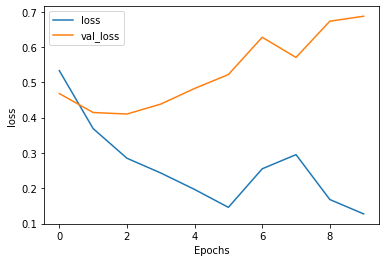

In [11]:
plot_graphs(history, 'loss')